In [18]:
import pandas
import folium
from IPython.display import IFrame
from selenium import webdriver
import os
import time

In [19]:
cocorahs_daily = pandas.read_csv("https://data.cocorahs.org/export/exportreports.aspx?ReportType=Daily&dtf=1&Format=CSV&State=NY&ReportDateType=reportdate&StartDate=9/1/2021&EndDate=9/4/2021&TimesInGMT=False")

In [20]:
print(f'shape of data: {cocorahs_daily.shape}')
cocorahs_daily.head()

shape of data: (1452, 13)


,ObservationDate,ObservationTime,EntryDateTime,StationNumber,StationName,Latitude,Longitude,TotalPrecipAmt,NewSnowDepth,NewSnowSWE,TotalSnowDepth,TotalSnowSWE,DateTimeStamp
0,2021-09-04,12:00 AM,2021-09-04 04:14 AM,NY-DT-35,Pleasant Valley 1.7 S,41.723700,-73.821000,0.00,0.0,0.00,NA,NA,2021-09-04 08:13 AM
1,2021-09-04,12:00 AM,2021-09-05 10:27 AM,NY-MR-15,Brockport 0.6 WNW,43.216150,-77.952530,0.00,0.0,0.00,0.0,NA,2021-09-05 02:26 PM
2,2021-09-04,12:00 AM,2021-09-05 05:06 PM,NY-ER-195,Springville 0.4 NE,42.513513,-78.664923,0.00,0.0,NA,NA,NA,2021-09-05 09:05 PM
3,2021-09-04,04:00 AM,2021-09-04 03:09 AM,NY-OS-20,Fulton 0.2 W,43.316500,-76.418550,0.02,NA,NA,NA,NA,2021-09-04 07:08 AM
4,2021-09-04,04:35 AM,2021-09-04 06:34 PM,NY-UL-6,New Paltz 2.4 S,41.714048,-74.086557,0.00,0.0,NA,NA,NA,2021-09-04 10:34 PM


In [21]:
cocorahs_daily["Latitude"] = pandas.to_numeric(cocorahs_daily["Latitude"], errors="coerce")
cocorahs_daily["Longitude"] = pandas.to_numeric(cocorahs_daily["Longitude"], errors="coerce")

cocorahs_daily = cocorahs_daily.dropna(subset=["Latitude", "Longitude"])

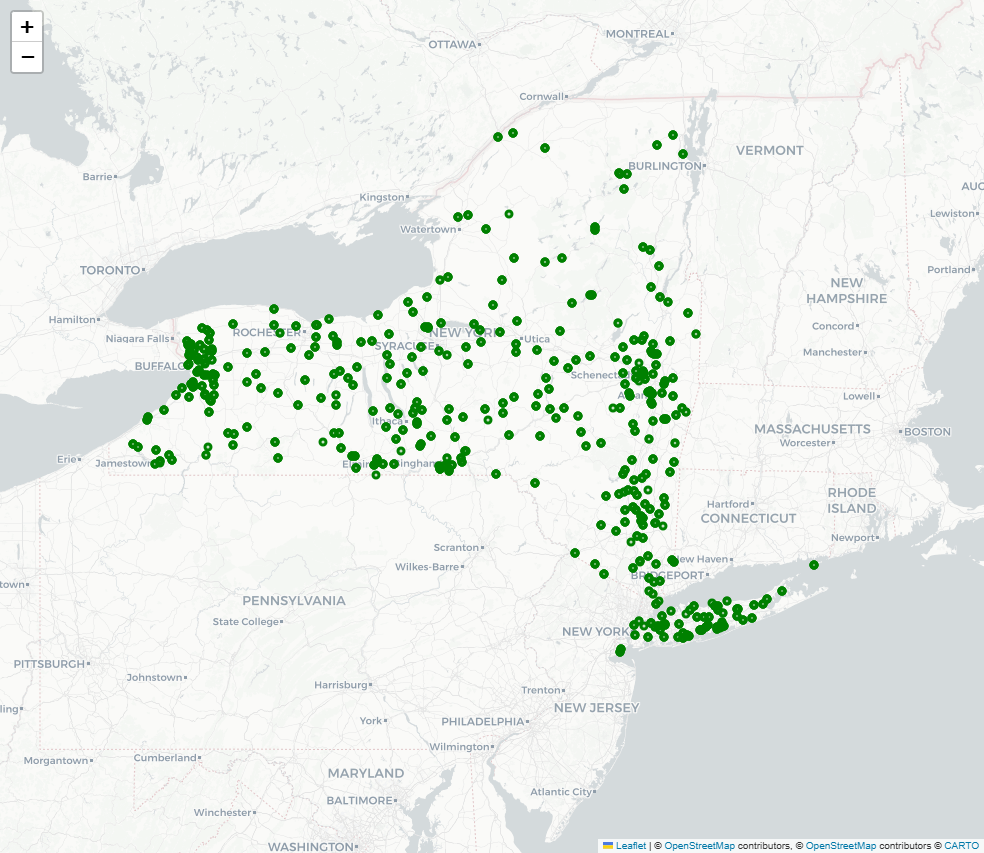

In [25]:
m = folium.Map(location=[cocorahs_daily["Latitude"].mean(), cocorahs_daily["Longitude"].mean()], zoom_start=7)
folium.TileLayer('cartodbpositron').add_to(m)

# Add stations
for _, station_values in cocorahs_daily.iterrows():
    location = [station_values["Latitude"], station_values["Longitude"]]
    popup = station_values["StationName"]
    marker = folium.CircleMarker(location=location, 
                                 popup=popup,
                                 radius=3,
                                 color="green",
                                 fill=True,
                                 fill_color="green")
    marker.add_to(m)

# Save the map before trying to open it
station_map = "stationmap.html"
m.save(station_map)

# Screenshot the map
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(options=options)

driver.set_window_size(1000, 1000)
driver.get("file://" + os.path.abspath(station_map))
time.sleep(3)  # let map tiles load

driver.save_screenshot("stationmap_screenshot.png")
driver.quit()

# Display the screenshot
Image("stationmap_screenshot.png")

In [9]:
cocorahs_sigwx = pandas.read_csv("https://data.cocorahs.org/export/exportreports.aspx?ReportType=SigWx&dtf=1&Format=CSV&State=NY&ReportDateType=reportdate&StartDate=9/1/2021&EndDate=9/4/2021&TimesInGMT=False")